# *Scirpts* con funciones

In [1]:
cd("/home/rafael/UNAM/Sanders/Mancuerna/Dumbbell/Dumbbell-Julia/Codigo-julia")

include("dumbbell_type.jl")
include("Gram_Schmidt.jl")
include("dumbbell_lyapunov_functions.jl")

using PyCall
using PyPlot

@pyimport matplotlib.animation as anim 

INFO: Loading help data...


In [2]:
?dumbbell

DataType   : dumbbell (constructor with 2 methods)
  supertype: Any
  fields   : (:position,:angle,:velocity,:omega,:m,:l,:collision_counter)


In [3]:
# Inicializar una mancuerna

rcm = [1., 1.]; l0=0.2; m0=1.; vcm = [2.1, 0.6]; θ=π/6; ω=2.

db = dumbbell(rcm, θ, vcm, ω, m0, l0, 0)

walls = [[-3,3], [-2, 2]];

## Trayectoria de la mancuernca

In [4]:
reset_dummbell(db)

T=25. # tiempo de movimiento

time, pos_p1, pos_p2 = trajectory(db, T);

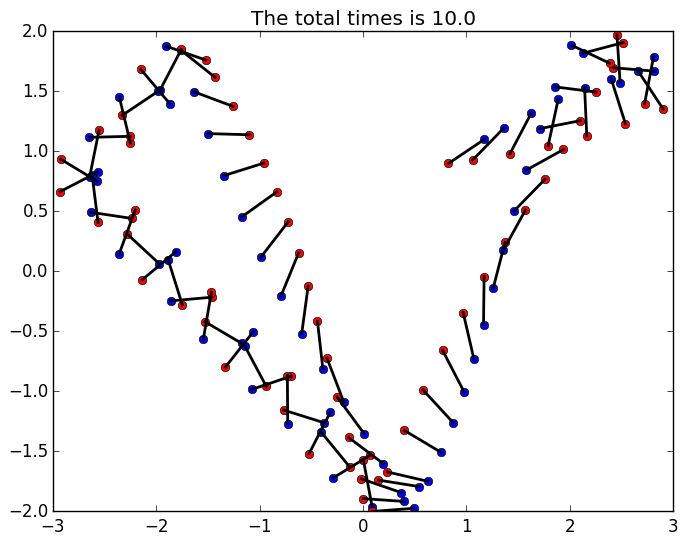

PyObject <matplotlib.text.Text object at 0xaf277e4c>

In [5]:
tf=200; dt=3; TF = tf*0.05
plot(pos_p1[1:dt:tf, 1], pos_p1[1:dt:tf, 2], "ob")
plot(pos_p2[1:dt:tf, 1], pos_p2[1:dt:tf, 2], "or")

for i in 1:dt:tf
    plot([pos_p1[i,1], pos_p2[i,1]], [pos_p1[i,2], pos_p2[i,2]], "k", lw=2)
end
xlim(-3,3); ylim(-2,2);
title("The total times is $TF")
    

### Animación

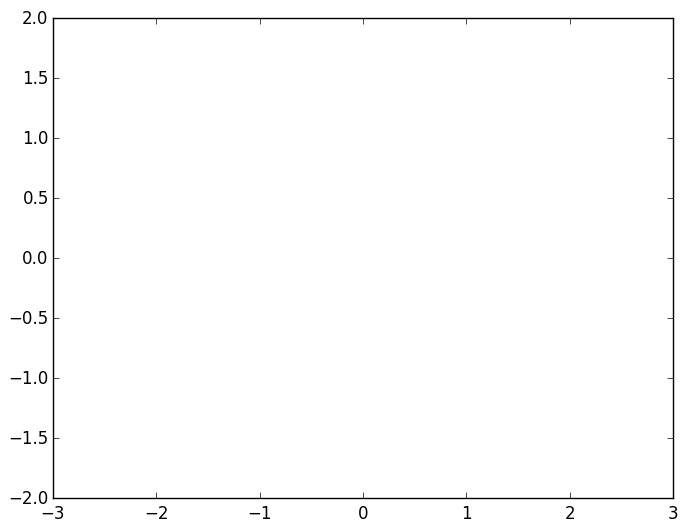

animate (generic function with 1 method)

In [6]:
# Configuración del lienzo
fig = figure();
ax = plt.axes(xlim=(-3, 3), ylim=(-2, 2));

# Cada carrito tiene un color diferente
# b: blue, r: red
# o es para dibujar puntos en lugar de rayas
global part1 = ax[:plot]([], [], "bo", lw=2)[1]
global part2 = ax[:plot]([], [], "ro", lw=2)[1]
global rod = ax[:plot]([], [], "k", lw=2)[1]
global ttl = title(" ")

# Inicialización
function init()
    global part1
    global part2
    global rod
    global ttl

    part1[:set_data]([], [])
    part2[:set_data]([], [])
    rod[:set_data]([], [])
    ttl[:set_text](" ")

    return ([part1, part2, rod, ttl],None)
end

function animate(i)
    global part1
    global part2
    global rod
    global ttl
    
    tf = @sprintf("%0.2f", (i+1)*0.05)
    
    part1[:set_data](pos_p1[i+1, 1], pos_p1[i+1, 2])
    part2[:set_data](pos_p2[i+1, 1], pos_p2[i+1, 2])
    rod[:set_data]([pos_p1[i+1, 1], pos_p2[i+1, 1]], [pos_p1[i+1, 2], pos_p2[i+1, 2]])
    ttl[:set_text]("Time = $tf")
    return ([part1, part2, rod, ttl],None)
end

In [ ]:
TF=500

myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=TF, interval=20, blit=true);
myanim[:save]("anim-dumbbell.gif", writer="imagemagick", fps=10);

![](anim-dumbbell.gif)

## Espectro de Lyapunov

Con la función `lyapunov_spectrum` de obtiene el espectro de Lyapunov después de un número fijo de colisiones, `N`.
Sus argumentos son, la mancuerna (`db`), las posiciones de las paredes (`walls`), el número de colisiones que se llevarán a cabo (`N`); y como argumentos opcionales: `check`(por *default* `check=false`) para implementar una función que revisa cuánto va dando la suma de los exponentes de Lyapunov y si la mancuerna sigue dentro de las paredes del billar; y `check_times` que especifica cuántas veces se realiza esta revisión (por *default* `check_times=3`). 

In [57]:
reset_dummbell(db)

nc=100 # número de colisiones

λ_col, λ_time, times, col_times=lyapunov_spectrum(db, walls, nc)

(
100x6 Array{Float64,2}:
 2.25869  1.85146   0.389209   -0.778905   -0.249198  -3.47125
 1.62169  1.159     0.554522   -0.38981    -0.913962  -2.03144
 2.22333  1.57687   0.566597   -0.310255   -1.84241   -2.21413
 1.52041  0.783152  0.425829   -0.172616   -1.1008    -1.45598
 1.96325  0.977456  0.421425   -0.257026   -1.22746   -1.87764
 1.75712  1.0264    0.6871     -0.237708   -1.04723   -2.18568
 1.92084  1.16304   0.264365   -0.166461   -1.07624   -2.10554
 1.91366  1.04765   0.0873642  -0.0589306  -0.779537  -2.21021
 1.54265  0.959909  0.120417   -0.0491905  -0.601016  -1.97277
 1.48107  0.835131  0.118432    0.098121   -0.682031  -1.85072
 1.38484  0.789874  0.107156    0.136821   -0.656163  -1.76253
 1.49967  0.825813  0.155631   -0.185882   -0.58041   -1.71482
 1.3852   0.790973  0.146869   -0.199938   -0.562658  -1.56044
 ⋮                                                     ⋮      
 1.73567  0.95439   0.448988   -0.384219   -0.899433  -1.85539
 1.71492  0.933169  0.442349 

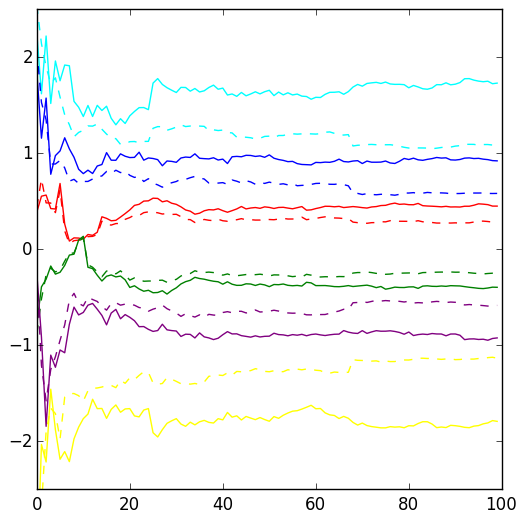

In [58]:
colors = ["cyan", "blue", "red", "green", "purple", "yellow"]
figure(figsize=(6,6))

for k in 1:6
    plot(λ_col[:,k], color=colors[k])
    plot(λ_time[:,k], color=colors[k], ls="--")
    ylim(-2.5,2.5)
end

### Ahora haciendo la revisión

In [59]:
reset_dummbell(db)

nc=100 # número de colisiones

check=true; c_times=10

λ_col, λ_time, times, col_times=lyapunov_spectrum(db, walls, nc, check, c_times)

Sum of Lyapunov Exponentes after 	10 collisions
1.9317880628477724e-14	1.6209256159527285e-14
Sum of Lyapunov Exponentes after 	20 collisions
1.0880185641326534e-14	8.659739592076221e-15
Sum of Lyapunov Exponentes after 	30 collisions
-2.2670754162845697e-13	-1.7186252421197423e-13
Sum of Lyapunov Exponentes after 	40 collisions
-1.7275070263167436e-13	-1.2856382625159313e-13
Sum of Lyapunov Exponentes after 	50 collisions
-1.3078427230084344e-13	-9.459100169806334e-14
Sum of Lyapunov Exponentes after 	60 collisions
-1.092459456231154e-13	-8.393286066166183e-14
Sum of Lyapunov Exponentes after 	70 collisions
-8.593126210598712e-14	-5.417888360170764e-14
Sum of Lyapunov Exponentes after 	80 collisions
-7.260858581048524e-14	-4.463096558993129e-14
Sum of Lyapunov Exponentes after 	90 collisions
-5.950795411990839e-14	-3.708144902248023e-14
Sum of Lyapunov Exponentes after 	100 collisions
-4.063416270128073e-14	-2.55351295663786e-14


(
100x6 Array{Float64,2}:
 2.25869  1.85146   0.389209   -0.778905   -0.249198  -3.47125
 1.62169  1.159     0.554522   -0.38981    -0.913962  -2.03144
 2.22333  1.57687   0.566597   -0.310255   -1.84241   -2.21413
 1.52041  0.783152  0.425829   -0.172616   -1.1008    -1.45598
 1.96325  0.977456  0.421425   -0.257026   -1.22746   -1.87764
 1.75712  1.0264    0.6871     -0.237708   -1.04723   -2.18568
 1.92084  1.16304   0.264365   -0.166461   -1.07624   -2.10554
 1.91366  1.04765   0.0873642  -0.0589306  -0.779537  -2.21021
 1.54265  0.959909  0.120417   -0.0491905  -0.601016  -1.97277
 1.48107  0.835131  0.118432    0.098121   -0.682031  -1.85072
 1.38484  0.789874  0.107156    0.136821   -0.656163  -1.76253
 1.49967  0.825813  0.155631   -0.185882   -0.58041   -1.71482
 1.3852   0.790973  0.146869   -0.199938   -0.562658  -1.56044
 ⋮                                                     ⋮      
 1.73567  0.95439   0.448988   -0.384219   -0.899433  -1.85539
 1.71492  0.933169  0.442349 